In [1]:
import MeCab
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')


In [4]:
#knock30
fname = 'neko.txt'
fname_parsed = 'neko.txt.mecab'


def parse_neko():
    '''「吾輩は猫である」を形態素解析
    「吾輩は猫である」(neko.txt)を形態素解析してneko.txt.mecabに保存する
    '''

    with open(fname) as data_file, \
            open(fname_parsed, mode='w') as out_file:

        out_file.write(mecab.parse(data_file.read()))

def neco_lines():
    '''「吾輩は猫である」の形態素解析結果のジェネレータ
    「吾輩は猫である」の形態素解析結果を順次読み込んで、各形態素を
    ・表層形（surface）
    ・基本形（base）
    ・品詞（pos）
    ・品詞細分類1（pos1）
    の4つをキーとする辞書に格納し、1文ずつ、この辞書のリストとして返す

    戻り値：
    1文の各形態素を辞書化したリスト
    '''
    with open(fname_parsed) as file_parsed:

        morphemes = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                raise StopIteration     # 区切りがなければ終了
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface': cols[0],
                'base': res_cols[6],
                'pos': res_cols[0],
                'pos1': res_cols[1]
            }
            morphemes.append(morpheme)

            # 品詞細分類1が'句点'なら文の終わりと判定
            if res_cols[1] == '句点':
                yield morphemes
                morphemes = []


# 形態素解析
parse_neko()

# 1文ずつ辞書のリストを作成
lines = neco_lines()
for line in lines:
    print(line)


'\nfor line in lines:\n    print(line)\n'

In [6]:
#knock31,32

def get_verbs_surface(fname_parsed):
    with open(fname_parsed) as file_parsed:
        verbs = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                continue     # 区切りがなければ終了
            res_cols = cols[1].split(',')
            if res_cols[0]=="動詞":
                verbs.append(cols[0])
            
        return verbs
def get_verbs_base(fname_parsed):
    with open(fname_parsed) as file_parsed:
        verbs = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                continue     # 区切りがなければ終了
            res_cols = cols[1].split(',')
            if res_cols[0]=="動詞":
                verbs.append(res_cols[6])
            
        return verbs
    
verbs = get_verbs_surface(fname_parsed)
for verb in verbs:
    print(verb)

生れ
つか
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい
見
見
思っ
残っ
いる
さ
れ
し
逢っ
出会わ
なら
し
いる
吹く
せ
弱っ
飲む
知っ
坐っ
おっ
する
し
始め
動く
動く
分ら
廻る
なる
助から
思っ
いる
し
出
し
いる
考え出そ
分ら
付い
見る
い
おっ
見え
隠し
しまっ
違っ
明い
い
られ
這い出し
見る
棄て
られ
這い出す
ある
坐っ
し
考え
見
出
し
泣い
来
くれる
考え付い
やっ
見
来
渡っ
かかる
減っ
来
泣き
ある
ある
し
廻り
始め
し
這っ
行く
出
這入っ
なる
思っ
崩れ
もぐり込ん
破れ
い
し
知れ
云っ
至る
する
なっ
いる
忍び込ん
分ら
なる
減る
降っ
来る
出来
なっ
あるい
行く
考える
這入っ
おっ
見る
し
逢っ
見る
つかん
抛り出し
思っ
ねぶっ
任せ
い
出来
見
這い
上っ
投げ出さ
れ
投げ出さ
れ
這い
上り
這い
上っ
投げ出さ
れ
繰り返し
し
いる
云う
なっ
し
やっ
下り
つまみ出さ
れよ
し
いい
来
ぶら下げ
向け
上っ
来
困り
いう
撚り
眺め
おっ
置い
やれ
這入っ
しまっ
聞か
見え
抛り出し
極める
し
合せる
帰る
這入っ
出
来る
思っ
いる
見せ
いる
いう
覗い
見る
し
いる
ある
読みかけ
ある
たらし
いる
帯び
あらわし
いる
食う
食っ
飲む
飲ん
ひろげる
読む
なる
垂らす
繰り返す
考える
ある
生れ
なる
限る
寝
い
勤まる
出来
云わ
せる
来る
鳴らし
いる
住み込ん
行っ
跳ね
付け
られ
し
くれ
さ
れ
至る
つけ
くれ
分る
出来
得る
入れ
くれ
いる
つとめ
読む
乗る
する
乗る
構い
やむを得ん
寝る
し
入っ
もぐり込ん
ねる
なる
入っ
寝る
見出し
割り込む
醒ます
なる
来
来
いっ
泣き
出す
さまし
飛び出し
くる
叩か
れ
し
すれ
する
せ
得
なっ
する
至っ
し
かぶせ
抛り出し
押し込ん
する
追い廻し
加える
磨い
怒っ
入れ
え
い
する
逢う
言っ
産まれ
持っ
行っ
棄て
来たそ
流し
話し
し
する
戦っ
せ
なら
いわ
れ
思う
隣り
解し
い
いっ
し
いる
見付け
食う
ある
なっ
いる
守ら
訴え

しまっ
する
使っ
愛する
出
さ
れ
乱れ
い
もっ
来
呑み込ま
せよ
急き込ん
知ら
云う
忘れ
付か
使っ
しまっ
考える
なる
する
命ぜ
られ
行っ
脱い
し
換える
出掛け
られ
云う
待ち構え
いる
来
くれれ
思っ
見る
出掛け
出す
褒める
思っ
脱い
磨き
上げ
つい
し
いる
聞こ
云う
やい
見える
さ
せ
出掛け
やろ
云う
なる
し
行こ
来
行っ
はなす
眺め
握っ
敲い
撫で
引っ繰り返し
さすっ
考え込ん
いる
し
云う
落ちつい
云う
致し
ござい
聞く
考え込む
いう
上げ
なり
なる
なる
いけ
帰る
過ぎ
やる
行っ
返っ
くる
ある
来
注い
置い
くれ
取り上げ
飲も
する
云う
し
出
くる
やむをえ
置く
飲み
なっ
い
飲ん
出掛け
思い切っ
飲ん
しまお
つける
する
飲も
置き
飲も
置い
いる
打っ
し
はおら
れ
取り上げる
留まっ
飲め
なる
始め
する
出来
する
する
消え
立つ
出来
思っ
し
行っ
得ん
云う
し
聞く
行き
過ぎ
這入
れ
云う
し
来
くれ
立つ
し
し
考え出す
思う
っ
すまし
する
立つ
云う
知れ
欠け
出し
笑い
云う
とぼけ
し
持っ
いう
云う
聞える
話し
聞い
い
潰す
強い
さ
せ
笑っ
がっ
する
思っ
し
い
使わ
し
かねる
ある
思わ
れ
い
し
かねる
云う
あっ
聞い
し
なっ
かれ
話し
し
聞い
い
られ
負け
なっ
つか
すれ
ある
しろ
書い
ある
知ら
切っ
いる
あり
ある
勝と
勝と
ほのめい
進め
し
いる
なる
見
帯び
て
考える
なっ
見
来よ
廻る
取り払わ
れ
なっ
見え
照らし
足ら
受け
呈し
いる
あっ
見え
立て
切っ
ある
行っ
知ら
構わ
し
し
上っ
寝
見る
し
忘れ
し
いる
する
出来
なり
参り
出来
上っ
申し
見せ
なさい
出来
浮かば
れ
剥げる
押し
使っ
持つ
申し
おり
崩し
え
申し
上げ
あげ
し
立ち上る
する
し
やり
なさい
する
し
来
立っ
動かさ
致し
引い
下さる
知れ
し
云う
し
貰っ
見える
誘い出し
思う
し
呑ん
聞い
いる
話し
途切れる
なら
する
し
いる
探し
ある
いたっ
はおり
云う
いっ
思っ
いる
云え
し
いる
出来る
死ぬ
誂え
参っ
誂

し
いる
利か
恐れ入っ
黙っ
いる
思っ
持っ
追っ
懸け
さげ
出来
あり
なっ
てる
やっ
起し
見える
云っ
通っ
する
持っ
飛び出し
来
云っ
云う
云う
し
おら
なら
せ
し
し
見える
立た
並べ立て
逢い
吹く
見え
逢い
なっ
掛っ
たまり
し
する
し
つく
合せ
なら
云う
吐か
すむ
吐く
あり
える
思い
くる
困り
聞き
行っ
なっ
しまい
聞き
行っ
持た
せ
やっ
受取る
持っ
帰れ
云う
取り
下さい
云っ
あり
舐める
飲ん
這入っ
しまっ
欠い
感じ
招い
途切れ
聞える
からかっ
いれ
すむ
困る
ある
食う
叩く
いる
叩い
叩か
馴れ
いる
聞き分ける
する
出来る
煩わし
思っ
出来
云う
なり
掛け
ほかなら
する
見る
なる
見える
し
くる
い
来る
来
云う
得よ
思い
詣り
し
なる
する
聞い
いる
云う
云う
入れ
する
貰っ
ほのめかす
ほのめかす
貰う
ある
貰っ
いか
云う
云っ
云っ
来
くれ
困り
違っ
云う
する
あり
いか
心得
いる
し
し
い
する
逢っ
諭し
見
くれ
怒っ
いる
知れ
怒る
し
いれ
計っ
やる
障
やめ
やる
云う
なる
張る
おっしゃる
する
なる
申し聞け
ある
やる
極める
行か
聞い
見る
し
なっ
もらう
出来る
知れ
ほのめかし
構わ
云っ
やっ
なっ
する
似合わ
思う
云っ
云う
聞く
困る
限る
云っ
出す
云う
逢っ
出来れ
貰い
がっ
いる
かん
云う
ある
似合わ
参っ
願い
行っ
聞く
出来
聞い
貰い
かしこまり
廻っ
帰っ
おり
住ん
おり
知ら
突き当っ
行く
崩れ
かかっ
ある
教える
あり
寄っ
見
分り
見れ
ある
あり
貼り
付ける
ふる
剥がれ
しまい
貼り
付ける
なり
する
懸け
知れ
驚き
崩れ
聞い
分る
分り
分ら
ある
生え
探し
行け
間違っ
こ
ある
なる
帰ら
聞け
伝わっ
廻っ
生え
いる
帰っ
来
喰わ
し
廻る
敷い
なっ
干し
いる
ある
織り
出し
売り捌い
なら
云う
買っ
来
通り越し
し
ある
し
化ける
続く
擦り切れ
読ま
れる
称する
省い
申す
持ち
持ち
持ち
持っ
持た
なら
思っ
いる
ある
申す
なっ
し
いる
思う
出張っ
支え
挟ん
いる
フケ
し
ある
知れ
し
思え

磨り潰し
思う
なる
取る
出来
なっ
なり
やっ
いる
なり
なっ
出来
磨り
磨り潰し
つか
述べる
磨っ
いる
磨り
始め
休ん
なる
磨る
しい
しい
云っ
行く
磨り
行く
磨っ
い
なっ
入り込み
し
云う
聞か
せ
ありがたがる
ある
あっ
行っ
出よ
し
出逢っ
向く
思っ
する
云っ
し
読み
来
通り掛っ
し
なっ
立ち寄っ
云っ
し
蒙
入れ
つける
なっ
磨っ
てる
出来
上る
聞く
かかり
見受け
られる
磨り
上げ
よる
かかり
なっ
してやり
磨り
上げ
出来
切っ
及び
磨っ
てる
し
い
行っ
話し
来
し
述べ
立てる
分ら
し
い
残ら
行っ
いらっしゃる
あり
尋ねる
し
とぼけ
いる
云う
途切れ
なっ
困っ
飛び出し
くる
行っ
逢う
云う
起る
聞く
し
思わ
れ
片付い
解し
おっしゃる
なさる
切り付ける
し
する
有っ
し
いる
残っ
い
知れ
なる
暮らし
いる
見廻
わす
云っ
し
いら
向い
伺い
変ら
する
話し
受ける
さ
れ
話す
開ける
代り
しまい
し
いけ
押し
取り掛る
する
去る
おこ
し
ひやかし
守っ
云わ
聴き
云う
する
ある
通っ
かかっ
出よ
する
する
だまっ
聴い
いらっしゃい
制する
暮れる
分ら
減る
ある
敲い
かよう
留め
くれ
云う
上がん
なさい
差し
つけ
見
え
云う
し
ある
見せ
思う
結い
取ら
れ
いる
這入っ
見る
切っ
あっ
坐っ
減り
云い
食わせ
し
炊い
上げよ
云う
取り掛る
し
聴き
し
聴く
聴き
いやし
話し
なる
し
い
られ
出
くる
云っ
云っ
復し
食い
厭き
い
なろ
し
かけ
入れ
煮
出し
見る
あい
いる
吹く
し
し
見
いる
立っ
出
行っ
する
抱い
込ん
帰っ
来
置い
覗い
見る
い
捲き
やっ
話し
し
なさい
寄せる
なる
廃せ
とっ
つかまえ
放り込ん
し
っ
思っ
なさい
怖がっ
いる
なる
し
いらっしゃい
立つ
立た
出
き
出
思う
出し
出
云う
出る
出る
なっ
しまっ
出す
這い出そ
する
引っ張ら
云う
答える
し
持っ
引く
残る
離れ
引く
抜け出し
くる
笑い
聞く
やる
取っ
もっ
掻き
交ぜ
召し上がれ
来
食っ
尋ねる
し
し
なさい
くっ
たべ
られ
こぼす
召し上がら
おっ

申す
這入り
込ん
き
する
食う
寝転ぶ
やっ
ふる
云う
つく
棄て
構え
申し込ま
打ち
過ぎ
知ら
知っ
咎めん
分ら
くる
なっ
見え
向け
て
来
云う
やめ
追う
変ずる
去っ
進ん
来
ある
取れん
加え
なっ
い
なら
うたい
だし
云う
忘れ
しまっ
入り
い
し
傾け
云う
云う
する
ある
合し
なっ
考え
見
飛び出し
行っ
這入る
出
給え
云っ
追い出し
ある
聞く
追い出さ
れれ
這入る
這入れ
うたう
する
違っ
知ら
云う
属し
い
なっ
ある
学ぶ
せら
れ
せら
なっ
し
ある
飛び出し
まえ
這入る
し
知ら
忘れ
思い
答え
戒め
放し
やっ
放し
やる
捉え
し
云っ
思っ
い
違う
し
し
抜ける
あける
思う
笑う
する
なっ
くる
合わ
立て
籠っ
奉っ
し
送っ
する
待っ
くれ
云っ
する
来
出来上がっ
こん
する
からかう
からかっ
遊ぶ
利か
からかう
からかわ
れる
からかう
云う
し
見る
ある
からかわ
れる
い
なら
いか
帰っ
来
し
話し
ある
聞い
見る
見
し
吠え
立てる
つか
こしらえ
立っ
吠え
狂っ
せ
つかし
やめる
笑っ
い
かう
来
し
され
云っ
過ぎ
なら
からかい
かける
さ
れ
しまう
からかう
むき出し
怒る
怒る
怒る
する
出来
云う
云う
ある
適し
いる
し
見
なる
投ぜ
られ
重ね
画い
くらし
云う
ある
出来
する
生き
いる
からかう
云う
つまり
作っ
遊ぶ
怒ら
せる
じらせる
弱ら
せる
ならん
しから
からかう
云う
耽る
知ら
うる
窮する
限っ
いる
する
殺し
陥れ
し
出来る
殺し
陥れ
する
よる
し
起る
過ぎ
示し
与え
云う
からかう
られ
なっ
出
来
し
い
み
云う
し
見
すま
わから
なり
し
握ろ
する
投げ
見
なる
返
出逢っ
見
構わ
抛
見
抱い
あるく
ある
なる
略する
致す
聞き
持っ
くる
教え
やる
説く
し
し
見る
からかう
もっ
し
似
いる
繋が
れ
いる
むき出し
騒い
引き
掻か
れる
繋が
れ
おら
縛ら
れ
いる
からかっ
し
ぶんなぐる
する
ある
し
勤め
からかう
からかう
する
し
しかる
心得
いる
なら
し
充ち
し
しかる
持て
あ
困っ
いる
備われ
からかわ
れ

云う
磨る
し
坐り込ん
でる
困る
云わ
れ
放と
説い
ある
云う
云う
教え
いる
分ら
分り
っ
こ
すれ
読ん
ある
聞い
置こ
置け
取ら
置け
取ら
切ら
思う
置け
切ら
思う
取ら
置け
取ら
切ら
れ
思う
置け
切ら
れ
思う
取ら
置け
取ら
置き
ある
忘れ
し
あり
分っ
なる
しまっ
置こ
置け
取ら
置け
心得
いる
し
いる
あっ
出
し
いる
やっ
あり
遊ん
でる
思っ
いらっしゃる
遊ん
でる
あり
せ
いか
云う
あり
云う
ある
あり
云う
聞い
聞き
なっ
食っ
奢り
行く
行く
ある
蒙ろ
云っ
困る
取り違える
いけ
い
ある
あり
書い
読む
ある
云っ
ある
云う
かい
る
云う
い
打ち殺す
仰向き
かえる
読み
いる
云う
すい
く
云う
付け
笑わ
れる
行く
困っ
行く
行け
い
雇っ
頂い
乗っ
行こ
畏まっ
走ら
せる
し
いただい
帰っ
行く
残る
坐っ
し
考え込ん
いる
云う
持っ
連れ
行っ
いたろ
し
喜ん
いる
驚きゃ
驚か
っ
ある
する
し
し
なる
見
おくれ
なる
知れ
し
くれ
おくれ
持ち
利か
おくれ
する
よる
おくれ
云う
行く
行っ
ありゃ
し
得
られ
行く
ある
する
承
述べ
立てる
なっ
来
云っ
てる
云う
聞い
い
し
及ん
立ち
帰っ
云う
取
直さ
述べ
立て
いる
知ら
思っ
持ち出し
い
なる
聞い
ある
推し
見る
聞い
聞か
とき
い
変りゃ
し
変る
変ら
知れ
ある
立ち行く
云う
し
出来
てる
し
生え
い
振っ
し
来
云う
し
立っ
繰り返し
やめ
寝よ
云う
すまし
切っ
やる
し
寝
くれ
頼む
し
寝かし
悟っ
云う
見え
する
まわる
し
くれ
責める
し
行っ
貼っ
ごまかし
やっ
し
噛ま
れ
用いる
ある
貼っ
おけ
云っ
ごまかす
得
い
云う
思っ
し
寝
しまっ
起き
見る
ぶらさがっ
引っかかっ
い
なっ
逢っ
来
話し
し
行っ
振り
舞わ
す
思っ
し
しまっ
し
やろ
思っ
てる
云う
受ける
見る
言う
受ける
いけ
なる
知っ
てる
飛び降り
し
ある
云わ
せる
なる
応ずる
出来る
云っ
狼狽え
いる
飛び下り
あらわれ
云っ
引き
がっ
い
云っ
騒ぎ立てる
なる
来
見
云っ
っ
云う
教え
行

なら
吐き
かけ
られ
たれ
かけ
られ
笑わ
れる
思わ
なら
つく
出来
し
恐れ入っ
いる
かよう
恐れ入っ
てる
笑う
思う
知れ
行か
し
怒る
名づける
云わ
れる
する
する
せる
もっ
はちきれん
し
いる
っ
動く
伝っ
する
飲み下し
いか
抱い
し
いる
つく
出向い
助け
くれる
思っ
まかり
越し
からかっ
し
困ら
し
し
忘れ
いる
からかお
困ら
せよ
つく
し
くれる
信じ
いる
好ん
なっ
いただい
いる
云わ
する
出来
云う
役に立つ
出来る
なら
向っ
なら
云う
買い被っ
し
いる
笑わ
れる
寄ら
来
し
なる
なる
困る
笑う
し
もっ
充たさ
れる
もっ
充たさ
れる
し
なら
れん
する
しから
する
する
移る
得
られん
し
する
かよう
考え
思っ
いる
ぬう
出
繰り返し
い
呼ば
れ
見る
食み出し
いる
這入り
云っ
たぎり
坐っ
いる
聞き返し
いる
構わ
来
行く
あるか
せ
られ
なっ
出
出る
行っ
聞こ
思う
つまら
思っ
脱い
上がっ
来
中っ
穿い
いる
破れ
よる
始め
与える
もっ
さ
れ
つけ
知ら
云っ
し
しめ
聞い
詰ら
いけ
し
なっ
行く
茂っ
通ら
あるい
いる
住ん
でる
なくなっ
迷い込ん
なる
なっ
する
なっ
佇ん
いる
鳴く
鳴く
鳴き
聞える
衝く
衝く
云う
あり
聞か
振い落す
鳴く
出掛け
思う
聞か
聞い
いわ
れ
思う
聞い
い
思い出し
見え
し
聞き返す
し
見
思う
あっ
し
廻る
笑い
注い
載せ
出し
来
下さい
い
留める
し
すまし
こしらえ
あっ
のしかかる
落し
始める
し
放さ
読める
読ん
い
あばか
れ
泣き
出す
あり
笑い
押しやる
抜こ
する
引き
かかっ
流れ込む
なさい
云う
出し
行っ
持っ
くる
知ら
話し
いる
張り
え
張っ
張っ
張れ
いる
なる
なっ
手伝っ
張れれ
行く
ある
云っ
威張っ
てる
云い
見つめ
いる
余っ
出来
い
出来
上っ
落ち
あらわ
せ
云う
し
し
い
思い切っ
圧し
つけ
表し
帰る
云っ
引きずっ
出
打ちゃ
置く
書い
飛び込む
知れ
糺せ
起っ
死ん
なっ
取り殺し
やる
消え
なくなっ
困ら
貰う
出来
出来
する
訳し
下さい
弱っ
過ぎ
する
おっしゃい
云っ
訳

In [7]:
verbs = get_verbs_base(fname_parsed)
for verb in verbs:
    print(verb)

生れる
つく
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある
落ちつく
見る
見る
思う
残る
いる
する
れる
する
逢う
出会う
なる
する
いる
吹く
する
弱る
飲む
知る
坐る
おる
する
する
始める
動く
動く
分る
廻る
なる
助かる
思う
いる
する
出る
する
いる
考え出す
分る
付く
見る
いる
おる
見える
隠す
しまう
違う
明く
いる
られる
這い出す
見る
棄てる
られる
這い出す
ある
坐る
する
考える
見る
出る
する
泣く
来る
くれる
考え付く
やる
見る
来る
渡る
かかる
減る
来る
泣く
ある
ある
する
廻る
始める
する
這う
行く
出る
這入る
なる
思う
崩れる
もぐり込む
破れる
いる
する
知れる
云う
至る
する
なる
いる
忍び込む
分る
なる
減る
降る
来る
出来る
なる
あるく
行く
考える
這入る
おる
見る
する
逢う
見る
つかむ
抛り出す
思う
ねぶる
任せる
いる
出来る
見る
這う
上る
投げ出す
れる
投げ出す
れる
這う
上る
這う
上る
投げ出す
れる
繰り返す
する
いる
云う
なる
する
やる
下りる
つまみ出す
れる
する
いう
来る
ぶら下げる
向ける
上る
来る
困る
いう
撚る
眺める
おる
置く
やる
這入る
しまう
聞く
見える
抛り出す
極める
する
合せる
帰る
這入る
出る
来る
思う
いる
見せる
いる
いう
覗く
見る
する
いる
ある
読みかける
ある
たらす
いる
帯びる
あらわす
いる
食う
食う
飲む
飲む
ひろげる
読む
なる
垂らす
繰り返す
考える
ある
生れる
なる
限る
寝る
いる
勤まる
出来る
云う
せる
来る
鳴らす
いる
住み込む
行く
跳ねる
付ける
られる
する
くれる
する
れる
至る
つける
くれる
分る
出来る
得る
入れる
くれる
いる
つとめる
読む
乗る
する
乗る
構う
やむを得る
寝る
する
入る
もぐり込む
ねる
なる
入る
寝る
見出す
割り込む
醒ます
なる
来る
来る
いう
泣く
出す
さます
飛び出す
くる
叩く
れる
する
する
する
する
得る
なる
する
至る
する
かぶせる
抛り出す
押し込む
する
追い廻す
加える
磨く
怒る

いる
出す
出る
する
響く
驚かす
れる
見渡す
見える
巻き込む
れる
出る
行く
云う
起る
訴える
求める
刺し通す
行く
答える
眺める
呼ぶ
洩れる
来る
思う
れる
思う
乗る
呼ぶ
飛び込む
する
見つめる
いる
浮く
来る
思う
込める
飛び上がる
おく
落ちる
しまう
飛び込む
ぱちつかせる
問う
行く
思う
つまむ
飛び込む
なる
さめる
見る
ある
濡れる
飲む
する
飛び込む
気が付く
見渡す
驚く
飛び込む
いる
間違う
飛び下りる
出る
行く
出来る
笑う
する
いる
似る
いる
なる
云う
する
驚かす
なる
する
行く
突く
いる
する
見える
開く
ある
負ける
出す
ある
ある
笑う
欠ける
着く
いる
まぜ返す
違う
聞かす
くれる
云う
連れる
行く
やる
聞く
する
云う
よす
する
なる
持つ
来る
云う
よす
云う
する
引き下がる
なる
云う
聞く
知る
聞く
せる
行く
下す
いる
する
行く
行く
しいる
云う
懸ける
行く
這入る
れる
云う
行く
云う
在る
する
する
踏む
脱す
する
やめる
云う
する
知る
踏む
聞く
来る
かかる
する
すむ
泣く
出す
行く
する
くる
行く
する
行く
着く
する
いける
する
はいる
れる
行く
聞き返す
行く
とる
這入る
れる
教える
られる
述べる
過ぎる
押す
見る
答える
する
聞く
する
いる
明く
する
起る
思う
する
動ける
なる
加える
困る
なる
叶える
やる
叱りつける
聞く
する
せる
する
せる
する
酬いる
ある
ある
連れる
行く
行く
れる
行く
連れる
行く
やる
連れる
行く
やる
する
くらむ
乗る
降りる
出来る
思う
する
くらむ
くる
見る
もらう
する
する
する
やる
帰る
なる
上げる
云う
困る
飲む
いる
思う
行く
喜ぶ
見る
云う
外れる
なる
来る
する
いらっしゃる
聞く
行く
行く
直る
見せる
する
いる
洗う
着る
換える
待つ
いる
云う
しく
なる
する
する
する
出来る
する
知れる
なる
来る
する
考える
説く
聞かす
起る
取り乱す
する
せる
考え出す
呼ぶ
呼ぶ
云う
心得る
いる
聞く
知る
知る
使う
からかう
出来る
なさる
ある
する
折る
れる
しまう
する
使う


込む
見透かす
ある
思う
廻る
知る
出る
する
隠れる
恐れる
云う
逢う
諦める
なる
出る
ずる
振る
廻す
承る
よる
思う
ある
思う
思う
する
見る
出来る
出来る
する
冒す
見る
知れる
考える
する
得る
仕る
押しつける
見渡す
明け放つ
向く
睨める
付ける
いる
睨む
れる
生れる
始める
向ける
する
いる
かくれる
見える
する
生す
いる
ある
出来る
云う
吹く
いる
定める
する
見る
有す
いる
する
足る
云う
上る
入る
有す
帯びる
生れる
来る
行く
承る
分る
出掛ける
行く
聞く
ある
教える
ござる
なる
得る
得る
する
いる
煮える
切る
困る
向く
困る
困る
なる
行く
受ける
吹く
申す
する
する
いる
なる
合せる
いる
話す
なる
聞く
する
いる
萌す
する
出る
いえる
おりる
気が付く
ある
喰う
掛る
捲く
上げる
驚く
云う
見る
起る
懲らしめる
いじめる
やる
思う
当る
やる
答える
なる
承る
する
いる
利く
恐れ入る
黙る
いる
思う
持つ
追う
懸ける
さげる
出来る
ある
なる
てる
やる
起す
見える
云う
通る
する
持つ
飛び出す
来る
云う
云う
云う
する
おる
なる
する
する
する
見える
立つ
並べ立てる
逢う
吹く
見える
逢う
なる
掛る
たまる
する
する
する
つく
合せる
なる
云う
吐く
すむ
吐く
ある
える
思う
くる
困る
聞く
行く
なる
しまう
聞く
行く
持つ
せる
やる
受取る
持つ
帰る
云う
取る
下さる
云う
ある
舐める
飲む
這入る
しまう
欠く
感じる
招く
途切れる
聞える
からかう
いる
すむ
困る
ある
食う
叩く
いる
叩く
叩く
馴れる
いる
聞き分ける
する
出来る
煩わす
思う
出来る
云う
なる
掛ける
ほかなる
する
見る
なる
見える
する
くる
いる
来る
来る
云う
得る
思う
詣る
する
なる
する
聞く
いる
云う
云う
入れる
する
貰う
ほのめかす
ほのめかす
貰う
ある
貰う
いく
云う
云う
云う
来る
くれる
困る
違う
云う
する
ある
いく
心得る
いる
する
する
いる
する
逢う
諭す
見る
くれる
怒る
いる
知れる
怒る
する
いる
計る
やる
障る
やめる
やる
云う

下る
出来る
落ちる
くる
解く
する
する
れる
ある
する
見せる
やってのける
ある
なる
捕る
せる
さる
云う
頼む
くる
する
する
考える
出る
起る
決める
得る
つく
起る
考える
なる
見渡す
見る
給う
貰う
限る
並べる
する
する
する
付く
起る
する
起る
する
得る
欲する
起る
極める
取れる
云う
考える
見る
分つ
選ぶ
得る
苦しむ
出る
応ずる
ある
現われる
ある
這う
上る
うる
ある
極める
なる
なる
する
通る
出る
廻る
する
れる
する
見る
申す
似る
いる
なる
なる
めぐらす
いる
破れる
開く
ぬう
出る
出る
云う
云う
見える
する
する
帰る
懲りる
する
出す
おく
云う
聞える
飾る
分る
気取る
鳴る
聞く
云う
なる
出る
要する
云う
切り抜く
れる
吹く
勤める
いる
散る
誘う
吹き込む
いる
覚ます
差す
かかる
寝過ごす
する
振る
窺う
聞える
出る
出る
しだす
抑える
あらす
いる
出る
すくむ
待つ
いる
出る
来る
やむ
掛る
する
隔てる
やる
いる
する
離れる
おる
近寄る
遠のく
出す
する
いる
待つ
おる
なる
いる
這入る
れる
開ける
おく
利く
鳴る
来る
近寄る
たぎる
隠れる
しまう
する
当る
振る
むく
ある
落す
込む
逃がす
続く
飛び下りる
見える
捕る
思う
捕る
知る
廻る
出す
する
流す
飛ぶ
頑張る
いる
騒ぎ立てる
云う
云う
疲らす
する
見る
する
ある
かかる
する
こす
ある
ある
云う
ある
いる
疲れる
坐る
動く
なる
動く
極め込む
いる
出来る
目ざす
思う
云う
消える
云う
残る
云う
過す
抜ける
する
する
する
利く
出来る
なる
たどる
なる
眠る
在る
向く
開く
込む
思う
飛び出す
くる
ある
切る
喰う
つく
続く
廻る
思う
ぶら下がる
上る
込める
振り落とす
する
喰う
下がる
失う
懸る
這入る
砕ける
ふる
残る
張る
当る
跳ね返る
起き上がる
乗る
掛る
蹴る
掠める
縮める
立つ
見おろす
見上ぐ
光る
張る
差し込む
込める
飛び上がる
する
かかる
もがく
いる
死ぬ
喰う
下る
いる
懸ける
懸る
する
する
懸ける
える
なる
滑る
落ちる
なる
掻きむしる
聞える

務める
いる
引く
見える
着る
あびせる
見る
挟む
いる
張る
抱え込む
隣る
使える
使う
云う
する
いる
聞く
見る
言う
いる
渡る
斬る
出来る
渡る
できる
付く
行く
話す
攻める
困る
よこす
借る
する
くれる
云う
留める
おく
帰す
云う
云う
とめる
おく
見せる
出来る
帰る
見る
亡ぼす
れる
いる
云う
分る
する
する
たでる
いる
苦しむ
いる
見える
く
てる
見える
押し込む
出る
いる
似る
並ぶ
いる
爛れる
もつ
いる
ある
書く
くる
書く
過ぎる
する
出来る
やる
始める
する
いる
見る
われる
する
いる
変る
存じる
出る
這入る
する
あったまる
下さる
見る
上げる
述べる
立てる
答える
出来る
する
逢う
いる
する
する
する
見る
出す
踏み付ける
見る
思う
揚げる
出す
する
転じる
向う
這入る
云う
破る
する
取る
見える
する
まえる
なる
がる
いる
取る
れる
忘れる
いる
なる
すくむ
いる
消え去る
流す
出す
ある
見る
図抜ける
濁る
聴く
始まる
いる
する
浸る
おる
する
つける
有す
いる
出す
話す
わかる
取る
足る
始める
下がる
這入る
怒鳴る
見る
なる
する
叱る
する
くれる
知れる
やる
分る
もつ
おる
する
出る
来る
く
いる
振り返る
いる
答える
去る
示す
ならぶ
云う
云う
罵る
返す
分つ
いる
似合う
利く
いる
聞かす
れる
する
見える
する
黙る
する
跳ねかす
ある
する
去る
思う
いる
呼ぶ
なる
思う
過ぎる
いく
見る
する
超える
当る
ある
する
焚く
する
おく
切る
滞る
する
ある
煮る
這入る
する
限る
思う
しかる
出る
来る
かかる
く
くる
浮く
いる
する
いる
脱ぐ
棄てる
もつ
律する
いく
する
構う
陣取る
なる
上がる
する
出る
きる
従う
とる
なる
踏む
いる
ある
する
云う
抜く
する
出来る
癒す
よる
ある
する
する
貰う
なる
利く
迷う
く
てる
迷う
する
なる
する
なる
好む
する
こむ
いる
死ぬ
死ぬ
云う
する
いる
する
いる
殺す
かす
上がる
上がる
落ちる
思う
落ちる
重んずる
云う
ある
思う
云う
なる
取る
れる
怠る
たつ
いる
向う

する
おる
れる
こしらえる
なさる
する
造る
思う
やる
おる
答える
いる
する
する
出来る
云う
笑う
やめる
読む
わかる
罵る
云う
聞く
持つ
来る
振る
廻す
いる
知れる
なる
来る
窺う
いる
知る
もつ
見つめる
いる
立てる
込む
いる
始める
押し付ける
られる
する
回る
いう
見つめる
いる
なる
見る
ある
云う
する
見上げる
云う
言う
進む
なる
しいる
云う
感じる
云う
出来る
来る
云う
云う
云う
考え出す
く
膨らます
ふくれる
く
叩く
見る
分る
似る
ある
云う
する
考える
見る
する
ふくれる
持つ
来る
くれる
ふくれる
いる
ふくれる
する
いる
ふくれる
ふくれる
くる
ふくれる
上がる
なやむ
いる
聞く
怒る
する
帰る
ある
もつ
く
ふくらませる
申す
叩く
する
つく
いう
向ける
受ける
うつす
見る
見る
目立つ
向う
てる
見える
する
伸す
出来る
持つ
行く
する
いる
離れる
過ぎる
いく
悟る
云う
する
する
向う
あつめる
出来る
上る
思う
気がつく
見える
やめる
しまう
去る
引き寄せる
撫でる
撫でる
ある
吸取る
押しつける
吸い取る
れる
浮き出す
やる
する
転じる
裏返す
云う
やって退ける
する
いる
睨める
する
いる
見る
いる
なる
見える
もつ
してやる
演じる
いる
知れる
云う
する
云う
云う
云う
云う
過ぎる
措く
する
見出す
得る
飛び出す
出来る
飛び出す
なくなる
しまう
する
くれる
仕る
やる
貰う
出来る
なる
分る
喰う
す
出来る
聴く
聴く
する
する
過ぎる
説く
弁ずる
あまる
する
ある
ある
優る
知れる
追う
する
限る
離れる
ひねくる
いる
話せる
する
ぶる
思う
もつ
する
もつ
害す
する
飛ぶ
つくる
定める
尽きる
かける
する
見る
なる
暮らす
れる
気がつく
きまる
いる
気がつく
する
いる
見える
がる
下げる
恐れ入る
なる
する
いる
見る
恐れ入る
下げる
いる
なる
見る
悟る
印せる
られる
読む
得る
する
する
なる
やり込める
られる
知れる
かよう
考える
うかがう
いる
知る
する
する
いる
言う
する
こする
始める
なる
いる
擦る
たまる
する
きまる
てる

ある
買う
下す
おきる
還す
いる
云う
還す
云う
いる
いる
いう
分る
言う
いる
云う
還す
云う
ある
する
いう
繰り返す
いる
繰り返す
いる
ある
繰り返す
いる
云う
云う
いる
いる
還す
いる
教える
おっしゃる
還す
なさる
する
なさる
云う
する
する
堪える
落す
する
する
向く
見つめる
いる
揃える
いらっしゃる
云う
来る
聞く
睨める
答える
出る
行く
する
廻る
する
択ぶ
出る
来る
見る
聞く
なる
持ち上がる
云う
見る
なる
至る
あらわれる
くる
有す
いる
する
いる
思う
帰る
くる
抛り出す
する
する
する
く
あらわれる
来る
あらわれる
あらわれる
いる
あらわれる
来る
する
撫でる
がる
おる
出来る
つく
あるく
行く
動く
戴く
出来る
見る
追う
返る
いる
見える
刈り込む
く
かためる
控える
いる
云う
刈る
見える
延ばす
惹く
かぎる
出来る
知れる
見る
分る
名づける
られる
着こなす
与える
印す
いる
坐る
こまる
いる
かしこまる
控える
する
及ぶ
する
いる
逢う
する
する
坐る
生れる
構える
かかわる
見る
かよう
する
具える
いる
思う
ある
やる
なる
なる
いう
ある
思う
れる
なす
云う
する
侮る
なる
しでかす
知れる
飲む
なる
頼む
騒ぎ出す
酔っ払う
取り落す
認める
差支える
ある
恐れ入る
云う
押し付ける
られる
いる
云う
つく
出来る
押しやる
敷く
云う
なる
云う
動く
剥げる
かかる
乗る
なさる
云う
する
いる
生きる
する
いる
乗る
見詰める
仕入れる
来る
する
敷く
れる
せる
れる
勧める
立つ
なる
潰す
睨める
する
いる
云う
坐る
生れる
く
切れる
かかる
訴える
いる
かかわる
敷く
控える
いる
かかわる
敷く
云う
敷く
する
集まる
する
する
する
する
する
する
する
すう
開ける
する
出る
冷やかす
痛み入る
いる
覚える
気取る
する
突きつける
見える
しめる
笑う
する
見る
比する
据わる
いる
流す
目立つ
見える
引き込む
する
いる
する
気がつく
開く
云う
する
いる
つく
いる
忘れる
なる
見る
する
する
する
する
出来る
見る
する
聞く
く
する
やっ

出す
読む
でる
思う
聞く
てる
出来る
云う
れる
見る
飲む
飲む
する
聞く
飲める
思う
飲む
はれる
上る
見る
られる
黙る
いる
読める
帰る
来る
ふる
見る
足りる
飲む
云う
見廻す
見る
練る
かためる
なる
いる
笑う
出す
よむ
笑う
至る
する
過ぎる
する
見える
のしかかる
寝る
いる
する
する
ある
する
行く
なる
ある
構う
困る
出来る
しまう
云う
着く
切らす
しまう
知る
てる
云う
這入る
食う
切らす
なる
なる
思う
呑む
なる
する
する
いる
かく
呑む
云う
ふかす
ふかす
ある
吹く
見る
吹く
吹く
吹く
返る
吹く
呑む
かすむ
呑む
云う
見せびらかす
呑む
なさる
貰う
貰う
貰う
いける
いける
知れる
貰う
する
貰う
ぶらさげる
出掛ける
呑む
思う
立てる
つづける
呑む
思う
あく
振り返る
這入る
這入る
思う
忘れる
つく
引き返す
とる
しまう
云う
ある
あける
溜める
呑む
やる
煙る
する
籠る
てる
云う
する
しまう
いう
言う
くるむ
呑む
下さる
云う
下りる
行く
云う
知る
照らす
する
帰る
来る
なる
つく
伏せる
起きる
上る
申し込む
聞く
下さる
する
いる
云う
聞く
いただく
寝る
起す
起きる
起きる
ある
起きる
寝る
云う
上げる
伝わる
流れる
這う
光る
いる
似る
寝る
寝る
認める
いる
起きる
起きる
ある
する
する
つく
弾く
弾く
出る
来る
聞く
困る
弾ずる
困る
聞える
困る
てる
聞える
弾く
知る
知る
ある
伺う
伺う
見る
分る
通じる
云う
ねぼける
弄する
する
なる
進める
する
いる
とる
見る
かぶせる
見る
する
暮らす
しまう
暮れる
鳴く
出す
思い切る
取り出す
出る
云う
弾く
する
取る
しらべる
見る
する
思う
研ぐ
する
する
持つ
ふるえる
云う
つける
弾く
云う
困る
云う
する
引き付ける
しらべる
見る
鳴く
いる
思う
下さる
思う
やる
する
弾く
弾く
する
立ち上がる
行く
黙る
聞く
下さる
する
れる
出来る
だまる
抱く
込む
出る
まつ
なする
する
思う
帰る
まぜ返す
なる
する
いいかねる
出る
引き返す
出る
買う
被る
消す
なる
する
なる
行く


In [11]:
#knock33
def filter_word(fname_parsed,keys,values,form):
    with open(fname_parsed) as file_parsed:
        words = []
        for line in file_parsed:

            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                continue     # 区切りがなければ終了
            res_cols = cols[1].split(',')

            # 辞書作成、リストに追加
            morpheme = {
                'surface': cols[0],
                'base': res_cols[6],
                'pos': res_cols[0],
                'pos1': res_cols[1]
            }
            flag = 0
            for key,value in zip(keys,values):
                if morpheme[key] != value:
                    flag = 1
                    break
            
            if flag == 0:
                words.append(morpheme[form])
                
                
            
            
            
            
        return words
    
words = filter_word(fname_parsed,["pos1"],["サ変接続"],"surface")
for word in words:
    print(word)
                
    

見当
記憶
そうだ
話
装飾
突起
運転
記憶
ようやく
分別
決心
我慢
ようやく
餓死
訪問
始末
猶予
遭遇
我慢
記憶
返報
そうだ
勉強
勉強
昼寝
珍重
昼寝
経験
同居
観察
断言
同衾
迫害
尊敬
生活
剿滅
議論
憤慨
観念
御馳走
掠奪
代言
我儘
我儘
失敗
話
投書
決心
昼寝
鑑定
話
述懐
想像
写生
感心
昼寝
失笑
揶揄
写生
欠伸
自白
彩色
写生
判然
心中
感服
小便
猶予
失敬
欠伸
予定
失望
漫罵
小便
増長
増長
我儘
我慢
報道
昼寝
退屈
加減
一睡
運動
嘆賞
佇立
記憶
珍重
身動き
挨拶
鼓動
軽蔑
察
肥満
御馳走
乱暴
教育
交際
同盟
敬遠
軽侮
問答
そうだ
御馳走
邂逅
邂逅
相当
雑談
自慢
質問
発達
比較
覚悟
長い
自慢
感心
謹聴
呼吸
弁護
思案
吶喊
感心
喝采
質問
反対
呈出
大息
加減
決心
御馳走
御馳走
要心
放蕩
放蕩
放蕩
そうだ
放蕩
放蕩
放蕩
自任
放蕩
卒業
料理
首肯
批評
訪問
忠告
写生
写生
変化
写生
主張
発達
感心
感服
捏造
話
対話
想像
加減
顧慮
挑撥
忠告
著述
出版
記憶
傍聴
傾聴
話
注意
写生
相違
降参
写生
るし
注意
消沈
紅葉
昼寝
感心
御馳走
家で
感服
ようやく
動揺
感服
苦心
相違
判然
苦心
属
浴
軽侮
評価
製造
応用
按排
加減
判然
区別
存
向上
識別
そうだ
発達
同情
達観
達観
行列
勉強
一見
意味
恐縮
こう明
尊敬
存在
外出
卒業
合点
談話
活動
左右
自慢
合奏
挺
伴奏
挺
勘定
往来
恋着
諷刺
感心
失恋
関係
心配
返事
加減
散歩
陥落
ようやく
決心
来着
失恋
失敬
頂戴
頂戴
間食
留守
失敬
頂戴
頂戴
失敬
仕付
吹聴
分配
らく
附加
山盛
山盛
見物
歩行
拝見
我儘
承知
返事
病気
注意
散歩
下落
成道
慰安
冷笑
見当
発揮
属
保存
晩酌
攻撃
喧嘩
是非
忠告
因
本復
按腹
根治
按摩
治療
位置
顛倒
根治
昏睡
閉口
是非
呼吸
運動
廃
変化
心配
病気
議論
研究
反駁
学問
弁解
見当
挨拶
晩酌
影響
遠征
経験
我儘
そうだ
散歩
苦心
往来
歩行
探険
裁縫
ようやく
探険
話
ていは
膠着
白状
ねばねば
感得
熟視
催促
焦慮
始

紹介
心配
充満
心配
心配
反射
作用
活動
処置
窮
分別
出所
監督
煽動
監督
心配
相違
監督
仮定
出立
監督
発明
相違
心配
自覚
希望
心配
後悔
成功
放逐
退校
談判
につぎ
弁解
稽古
摩擦
会釈
散歩
相違
冒険
哀願
探検
話
心配
失敬
協商
了見
経験
超絶
挨拶
嘆願
訣別
学問
質問
質問
信用
体どう
心配
心配
安心
共同
手分け
投函
恐縮
相談
退校
心配
退校
吹聴
心配
解釈
いたずら
分別
いたずら
退校
放逐
帰国
是非
散歩
運動
遠慮
対坐
勝負
度外
謙遜
発明
拝見
解
いたずら
退去
身動き
発明
嗜好
代表
推知
断言
一言
了見
いたずら
行動
待った
待った
記憶
待った
座禅
関係
排列
献上
心配
心配
下宿
だき
談話
関係
注意
激
奮発
一喝
流行
せわ
真似
上達
お話し
独習
独習
独習
参考
往来
話
加減
進上
登校
話
そうだ
突進
話
きが
そうだ
奉職
そうだ
話
独習
勘定
勘定
失敬
計算
話
制裁
話
始末
大息
質問
注意
そうだ
失敬
弁護
賛成
代表
是非
結婚
向上
開拓
経験
拝聴
向上
訓戒
説教
感心
渇仰
稽古
苦心
用意
制裁
迫害
同情
呼ばわり
散歩
敬服
稽古
散歩
破裂
感心
形容
散歩
決心
譴責
軽蔑
絶息
退校
処分
想像
奮発
病気
遠で
祈念
辛抱
話
成就
辛抱
同情
話
進行
挨拶
進行
我慢
注文
下宿
抗議
写生
承知
攻撃
注意
落葉
難渋
心配
反射
叙述
失敗
徘徊
沈澱
号
相違
退去
辟易
談話
散歩
計画
帰
相当
散歩
探偵
比較
同情
比較
話
進行
慰藉
慰藉
話
勘定
計算
ふか
按摩
芝居
勘定
降参
約束
話
返事
用意
話
中止
往来
ようやく
往来
ようやく
下宿
下宿
息
ようやく
露見
問答
拝聴
露見
仲間入り
説明
調和
調和
調和
調和
安心
質問
進行
露見
沈澱
下宿
始末
自炊
散歩
油断
相違
発覚
相違
弄
疲労
露見
隠居
用意
登山
胡坐
勘弁
湯に
露見
逗留
御馳走
降参
昼寝
話
心配
垂涎
話
見当
鑑定
ようやく
案出
注意
冷評
安心
話
失敬
謹聴
謹聴
停電
判然
ようやく
落葉
一目
演習
ようやく
製造
感心
区別
反響
安心
真似
解釈
歓迎
狂乱
分別

In [20]:
#knock34
fname_parsed = 'neko.txt.mecab'
with open(fname_parsed) as file_parsed:
    
    target = []
    for line in file_parsed:
            
            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                break     # 区切りがなければ終了
            res_cols = cols[1].split(',')
            
            if len(target) == 1:
                if cols[0] == "の":
                    target.append(cols[0])
         
                else:
                    target = []
            elif len(target) == 2:
                if res_cols[0] == "名詞":
                    target.append(cols[0])
                    print(target[0]+target[1]+target[2])
                    target=[]
                else:
                    target=[]
            else:
                if res_cols[0] == "名詞":
                    target.append(cols[0])
                   
                else:
                    target = []

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
何の事
肝心の母親
藁の上
笹原の中
ようやくの思い
池の前
ようやくの事
一樹の蔭
垣根の穴
隣家の三毛
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔
自分の住家
吾輩の主人
家のもの
うちのもの
彼の書斎
本の上
皮膚の色
本の上
彼の毎夜
主人の傍
彼の膝
経験の上
飯櫃の上
炬燵の上
ここのうち
小供の寝床
彼等の中間
小供の一人
例の神経
次の部屋
自分の勝手
吾輩の方
台所の板の間
吾輩の尊敬
そこの家
裏の池
親子の愛
もっともの議論
目刺の頭
鰡の臍
彼等のため
軍人の家
代言の主人
教師の家
猫の時節
吾輩の家
胃弱の癖
後架の中
平の宗盛
月の月給
当分の間
下のよう
今更のよう
主人の述懐
彼の友
金縁の眼鏡
主人の顔
訳のもの
金縁の裏
吾輩の後ろ
彼の友
顔のあたり
上乗の出来
顔の造作
他の猫
不器量の吾輩
斑入りの皮膚
主人の彩色
種の色
身内の筋肉
主人の予定
座敷の中
悪口の言いよう
彼の背中
こっちの便利
自己の力量
人間の不徳
吾輩の家
うちの小供
小春の穏
茶の木の根
西側の杉垣
他の庭
純粋の黒猫
彼の皮膚
柔毛の間
吾輩の倍
嘆賞の念
好奇の心
彼の前
小春の風
杉垣の上
梧桐の枝
枚の葉
枯菊の茂み
真丸の眼
人間の珍重
双眸の奥
吾輩の矮小
額の上
声の底
ここの教師
良家の猫
車屋の黒
主義の的
彼の名
軽侮の念
左の問答
車屋の方
うちの主人
車屋の猫
どこの国
己の後
教師の方
車屋の黒
茶畠の中
黒の比較
彼の鼻
彼の気焔
自分の手柄
彼の答
鼠の百
去年の大掃除
うちの亭主
石灰の袋
椽の下
いたちの野郎
去年の臭気
鼻の頭
黒の御機嫌
反対の結果
うちの亭主
己の御蔭
無学の黒
背中の毛
黒の子分
教師の家
教師のよう
吾輩の主人
十二月一日の日記
今日の会
質の人
人の妻君
人の大部分
連中のうち
吾輩の水彩画
一廉の水彩画
吾輩の水彩画
野暮の方
芸者の妻君
愚劣の考
自己の水彩画
十二月四日の日記
元の通り
夢の裡
水彩画の未練
夫子の所謂
君の忠告
物の形
色の精細
日記の事
彼の今日
唯一の楽
主人の情
下のよう
彼の一世
時の傍聴
ハリソンの歴史小説
歴史小説

君の名前
吾輩の襟
東京の本社
会社の方
君の職業
我々のうち
下の方
実業家の所
先の横丁
君のよう
あすこの女房
鼻の事
僕のよう
マンの鼻
部下のもの
鼻の事
クレオパトラの鼻
世界の表面
君のよう
君の所
人の事
類似の事
君の事
腹の内
一縷の冷風
文明の産物
這裏の消息
鼻の娘
何の罪
実業家の片割れ
没交渉の沙汰
実の弟
自己の態度
寒月の所
円転滑脱の鈴木
狼狽の気味
令嬢の方
人の悪口
どこの国
人情の機微
金田の妻君
糸瓜のよう
心の中
あれだけの財産
あれだけの器量
相応の家
万全の策
通りの訳
君の事
博士の学位
意のまま
金田の娘
普通の談話
本人の随意
はずのもの
君の事
あの男の口
主人の代理
迷亭の悪口
陰の喩
僕のよう
藤村の羊羹
瞬時の光景
無言の問答
無言の芝居
以心伝心の幕
自炊の仲間
例の金鎖
当世の才子
大根の兄弟分
主人の方
迷亭の食い気
羊羹の歯
頭の男
崎の当番
前の不平
記憶の底
崎の親友
汁粉の数
どこの国
俺の汁粉
裏の卵
迷亭の旧悪
安眠の妨害
時の坊主
仏の意
時の君
金巾のしゃつ
雨上りの水溜り
時の君
前の言
君の言
将来の参考
ものの口
君の写生
僕の有望
二人の話
寺の境内
迷亭の答え
神田の西洋料理
ものの内心
相の手
意志の一点
記憶の罪
意志の罪
意志の罪
一流の特色
時の語気
人の特色
孔雀の舌
今日の珍
真の珍
博士論文の稿
寒月の名
金田の娘
近来の珍
金田の娘
寒月の博士
自分のよう
白木のまま
首縊りの力学
寒月の事
鼻の恐縮
不安の様子
金田の鼻
参考のため
寒月の所
者の子
実業家の末席
参考のため
ものの息女
天下の秀才
水島寒月の令夫人
実業家の君
学者の智識
何等の褒美
多年の疑団
歓天喜地の至境
迷亭の言葉
上手者の鈴木
象牙の箸
現象の説明
暗黒の淵
千載の下
以来の学者
彼の希
臘の哲人
彼の説明
ところの賞与
奨励の具
智識の威厳
オリムパスの山
クリーサスの富
相当の報酬
智識の匹敵
一個の活動
倦怠の念
羽織の紐
身投げの芸
智識の問屋
竜頭蛇尾の感
百獣の中
迷亭の悪口
主人のよう
迷亭の鋭鋒
無要の口論
封建時代の遺物
自己の思い
普通の人間
以外の心理
明治の紳士
鼻の主
時の容子
僕の方
敬服の至り
古今独歩の評論
学生の攻撃
防禦の具
巴里の大学
ゾラ

どこの何者
館の生徒
館の生徒
奥の方
庭前の光景
使の趣
事件の発展
こっちの肩
使の主意
例の倫理
忠臣蔵のよう
校の生徒
倫理の先生
主人の方
倫理の先生
庭の隅
羊の群
勘弁のしよう
多人数の事
学校の事
竜頭蛇尾の挨拶
倫理の先生
丹波の笹山
何のそれが大事
主人の大事件
人の大事件
強弩の末
主人の特色
五の小供
大事件の後
篇の結び
出任せのいい加減
宇宙の一大
之の文
薔薇の水
吾輩の文
金田の旦那
鈴木の藤
金田の邸
あちらの方角
拝顔の栄
両君の佇立
吾輩の罪
主人の動静
らいの程度
両君の談話
談話の方
吾輩の耳
都合のとき
君の旧友
自分の社会
上の地位
実業家の腕前
自分の損
学校の生徒
実業家の勢力
石炭の燃
殻のよう
苦悶の結果
主人の頭
同様の運命
実業家の勢力
何の作用
金の功力
金の威光
窮措大の家
実業家の御利益
冥頑不霊の主人
彼の悟り
主人の事
金田の事
銀の丼
主人の動静
表の門
裏の書生
裏の書生
人の世の中
自分の勉強
毎日の業務
骨折り損の草臥儲
主人の逆上
昨日の大事件
医者の薬
癪の源
自分の逆上
殊勝の志
奇特の心得
温厚の長者
私の胃病
自分の胃
催眠術のかい
理窟のもの
座敷の隅
主人の眼
眼の上
主人の眼
普通の通り
主人のうち
主人の家
嘘のよう
珍客の事
山羊のよう
前後の男
迷亭の美学
迷亭のよう
時の様子
華族の門前
天稟の奇人
円滑の意味
泥の中
自分のよう
自分の麺
自分の勝手
下手の裁縫
洋服の方
こちらの骨格
今の世
君の前
自分の心
今戸焼の狸
哲学者の前
中学の生徒
日本人の方
西洋人のやり方
とその向う
次の家
西洋人の遣り口
心の落着
西洋の文明
日本の文明
周囲の境遇
親子の関係
人のよう
親子の関係
在来のまま
関係の下
自分の心
館の生徒
今戸焼の狸
心の修業
消極の極
君の権力
金の問題
多勢に無勢の問題
君のよう
君の不平
鈴木の藤
最後の珍客
消極的の修養
主人の随意
日英同盟の今日
あばたの衰退
人口の増殖
交際の区域
主人の顔
何の因果
二十世紀の空気
鼻の頭
頬の上
あばたの体面
今のうち
軽蔑の意
万古不磨の穴
主人の小供
牛込の山伏
養子の代
主人のあばた
孤城落日のあばた
世紀の紀
あばたの顔面
不言の間
程度の労力
主人の痘痕
冥々の裡
小供の事
今のよう

In [23]:
#knock35
fname_parsed = 'neko.txt.mecab'
with open(fname_parsed) as file_parsed:
    
    target = ""
    count = 0
    for line in file_parsed:
            
            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                break     # 区切りがなければ終了
            res_cols = cols[1].split(',')
            
            if res_cols[0] == "名詞":
                target= target + cols[0]
                count += 1
            else:
                if count >1:
                    print(target)
                
                target = ""
                count = 0

した所
人間中
一番獰悪
時妙
一毛
その後猫
一度
邸内
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
一つ床
最後大変
神経胃弱性
言語同断
しようもの
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
我々同族間
一番先
もし相手
彼等人間
我等
吾人
白君
三毛君
いくら人間
いって人
間違いだらけ
後架先生
にも関
月給日
毎日毎日書斎
人の
自ら筆
眼鏡越
一室内
以太利
大家アンドレア・デル・サルト
自然その物
露華
寒鴉
これ一幅
活画
翌日吾輩
出て心持
辛棒
今吾輩
今吾輩
波斯産
ただ一種
上不思議
盲猫
心中ひそか
あと大
打ち壊わし
辛棒した人
馬鹿野郎呼わり
平生吾輩
元来人間
みんな増長
先どこ
数倍
十坪
腹加減
出て浩然の気
穏かな日
二時頃
昼飯後
運動かたがた
一本一本
心付く
横えて
庭内
忍び入り
出ずるよう
猫中
二三枚
挫しぐ
険呑
時吾輩
言葉付
誰だい
己れあ車屋
乱暴猫
同盟敬遠主義
らあな
大分強そうだ
おれなんざ
箆棒め
その後吾輩
車屋相当
不徳事件
日例
何匹
とろうとろう
ぴんと突
長い髭
元来黒
事彼
手柄話
墻壁
欠所
三四十
二百
何鼠
こん畜生
泥溝
奴め最後っ屁
二三遍
考げ
五銭
壱円五十銭
おい人間
胡魔化
鼠以外
大分放蕩
元来放蕩家
放蕩家
にも関
料理屋
水彩画家
通人論
批評眼
にも関
二日
通り下手
水彩画家
所謂通人
翌日例
金縁眼鏡
美学者
劈頭第一
結果今日
美学者
アンドレア・デル・サルトさ
大喜悦
美学者
アンドレア・デル・サルト事件
情線
滑稽的美感
仏国革命史
日本文学会
傍聴者
百名
皆熱心
歴史小説セオファーノ
女主人公
鬼気人
そうそうあすこ
僕同様
神経胃弱性
美学者
時ゃ別
美学者
美学者
模様画
君注意
半分降参
その後跛
眼脂
最後屁
二三段
三間半
毎日学校
家で無名
一枚
絵端書
年始状
うまい色
険呑
絵端書
絵端書
吾輩猫属
いくら猫
粗末簡便
一列一体
平等無差別
自家固有
鼻付
張り具合
立ち按排
垂れ加減
粋無粋
同類相求むと
いくら人間
二年目
大方熊
絵端書
四五疋
春一日
不思議そう
絵端書


君パスカル
そりゃそう
そうそう寒月寒月
結婚事件
今日金田
苦沙弥さん
迷亭君
一遍僕
当人同士
御苦労様
当人同士
頑固光沢消し
冷酷不人情
先日鼻
金田某
鈴木君
当人同志
苦沙弥先生
もし当人同志
確め
娘自身
鈴木君
寒月君
嬢さん
鈴木君
これゃちょっと僕
寒月君
ん奴
寒月さん
鈴木君
大道易者
鈴木君
寒月君
鈴木君
ようやく安心
財産はいらん
代り当人
迷亭君
賞め
全く迷亭君
水島君
鈴木君
依頼通り
鈴木君
今度寒月
一番近道
なに気
迷亭君
今度寒月君
迷亭君
迷亭先生例
苦沙弥
苦沙弥
十年
一遍
鈴木君
一生旅烏
鈴木君
十年
迷亭君
鈴木君
神経的
君電気鉄道
鈴木君
なんぼ田舎者
街鉄
六十株
そりゃ馬鹿
八百八十八株半
大方虫
十株
苦沙弥
菓子皿
万事積極的
真似ら
曾呂崎
一度
歯痕
曾呂崎
天然居士
沢庵石
曾呂崎
鈴木君
一番下手
曾呂崎
僕あいつ
曾呂崎
鈴木君
十年前
苦沙弥
曾呂崎
毎晩いっしょ
慢性胃弱
苦沙弥
曾呂崎
毎晩竹刀
卵塔婆
アハハハそうそう坊主
仏様
僕の
鈴木将軍の
手暴
大小三個
是非元
いかん懺悔
苛い
言草
十年前
言草
帰泉院殿黄鶴
居士安永五年辰正月
美学上
ゴシック趣味
言草がさ
天地間
泥だらけ
写生帖
百日紅
百日紅
美学原論
きっと書物
先生一
二十日
一枚
百日紅
当人平気
鈴木君
君方
剛情
一枚
迷亭君自身
時君
一歩
美学原論
百日紅
迷亭君一流
鈴木君
一大珍報
珍報
齎らす男
珍報
珍報
正札付一厘
珍報
君寒月
是非通知
団栗博士
鈴木君
さっき鈴木君
先日喧嘩
迷亭先生自賛
珍報
珍報
珍報
貰うまい
損い
仏師屋
鈴木君
ぐる男
鈴木君
その後鼻
頃トリストラム・シャンデー
鼻論
鼻名
果つる
不憫千万
今度ここ
美学上
喋舌
鈴木君
鈴木君
鼻恋
鼻恋
金田某
秀才水島寒月
我々朋友たる者
十年前
鈴木君
胡麻化そう
希臘人
百方奨励
鈴木君
両三日前
美学研究
一度
漆桶
鈴木君
菓子皿
吾人
希臘
逍遥派
元祖アリストートル
曰くさ
菓子皿
彼等希臘人
技芸その物
智識その物
もし智識
何物
智識以上
智識以上
十分理解
金田某
何だい紙幣
眼鼻
活動紙幣
活動紙幣
活動切手
寒月君
学問最高
長州征伐時代
日夜団栗
吾妻橋
有りがち
発作的所為
問屋たる
迷

幾人
もし木戸
密猟船
張り番
方専門
主人方
もし主人
後架後架
即ち主人
一二人
大概逆上
古来欧洲人
吾人
四種
鈍液
壮ん
その後人文
鈍液
憂液
付五升五合
五升五合
交番焼打
当時巡査
警察署
医学上
癒やす
濡れ手拭
濡れ手拭
長寿法
ざる者
沙門雲水行脚
衲僧
六祖
大分発明
一日
上の名
勿体そう
狂気では人
下宿屋
臨時気違
一生涯
向う間
逆上術
同じく大
毎日渋柿
十二個
かん徳利
鉄砲風呂
葡萄酒
態度動作
心的状態
線香一本
間我慢
快走船
逆上受合
きっと血
人為的逆上
早晩随意
弊竇
天晴
張り合
事件その物
落雲館
敵軍
一種
任意これ
敵中
いくらダムダム
落雲館
自覚せん事
落つるボール
一発
威嚇性
極そこいら
希臘
学者作家
学者作家
営養不足
学者作家
学者作家
みんな営養不足
金柑頭
先生例
高い木
時イスキラス
希臘時代
甲羅つき
鬼殻焼
折柄
時鷲
そうだそうだ
高い所
禿岩
解決しよう次第
落雲館
六畳敷
学者作家
落雲館
ダムダム丸
もし敵
二週間継続
銅壺
二週間
銅壺
予想せん
苦沙弥先生
出て午睡
雁鍋
誂らえて来い
塩煎餅
茶羅ッ鉾
雁鍋
いましょう
一斤
椽側一杯
落雲館
十八九
四ツ目垣
主人自ら
通り主人
逆上家
夫子自身
今一歩
敵軍
こと出馬
邸内
交渉はかく
散文的
結了
是非大事件
防禦策
落雲館
授業中
昨日敵中
らん国
昔人
道一以
高声
皮肉家
冷評的分子
教師たる者
永久ダムダム弾
うち頭
漸次回復
濡れ手拭
一度
一尺
また旅順
アキリス
三匝
燕ぴ
長坂橋
丈八
横えて
軍百万人
それ以外
太古蒙昧
馬鹿気
日本国帝都
野蛮的行動
焼打以上
臥竜窟主人
苦沙弥先生
落雲館裏八百
陣勢
陣立ていかん
四つ目垣
戦闘線内
縦隊総がかり
砲隊
臥竜窟
五六間
一人
臥竜窟
戦闘準備
何物たる
文盲漢
今日中学程度以上
砲隊
近所迷惑
運動遊戯
使いよう
運動術
借りて詐偽
働ら
世間一般
今吾輩
ベースボール即ち攻城的砲術
たる砲列
鄭寧
神経性胃弱
周囲附近
弥次馬兼援兵
臥竜窟邸内
近来諸所
大抵一隊
たま拾
一部隊
落弾
落ち場所
邸内
邸内
邸内
邸内
邸内
四つ目垣
四つ目垣
あまり頭
敵軍
一弾
四つ目垣
城壁即ち竹垣
運動律第一
一則
二則
二則
曰く運動
邸内
廻わる音

一冊
独仙君
二人
東風君
迷亭先生
寒月君
東風君
十時頃
十時頃
二時間
三時間
の何
迷亭先生
東風君
寒月君
百騎町
紺屋橋
二本ふか
紺屋橋
三人
秋の夜長
芝居がかり
みんな罪人
罪人さ
好男子寒月君
十時
秋の日
三ダース
寒月先生
薄気味
時主人
東風君
独仙君
ままヴァイオリン
四五人小僧
おいヴァイオリン
二度目
一番前
覚束
三四梃一度
五円二十銭
みんな丈夫
拵らえて
五円札
二十銭出して用意
事風呂敷包
幸誰
一丁
二三人
町内中
濠端
薬王師道
出てようやく下宿
二時十分前
東風君
気の毒そう
迷亭君
根気負け
随意さ
沙弥先生
東風君
大分人
天井裏
東風君
百姓家
東風君
寒月君
迷亭君
のだい
二行
君羅甸語
羅甸語
のだい
平生羅甸語
迷亭君
何だい
羅甸語
寒月君
寒月君それ
寒月君
得て隠し所
祖母さん
祖母さん
東風君
調和せん
天井裏
寒月君
東風先生
先生今日
大分俳句
子規子
驚ろ
子規さん
東風君
肝胆相
東風先生
寒月君
木槿垣
沈澱組
東風君
気の毒そう
論より証拠音
ぬすみ食
僕等
藤さん
藤さん
大変味淋
味淋
ある日藤さん
よせばいいのに苦沙弥君
味淋
苦沙弥先生元来酒
味淋
顔中真赤
二目
ありさまさ
羅甸語
藤さん
半分以上
大将隅
朱泥
三人
独り独仙君
古着屋
三日目
一軒屋
どうもこうも仕様
一杯煙草
邯鄲夢
洞入り
びらかすと
衣装道具
びらかす
偸ん
奴さん手拭
一それ
失敬さ
ハハハハじじい
二日間
五六十本半紙
湯壺
江戸趣味
江戸趣味
呉服屋趣味
肝胆相
二週間
二週間中爺さん
ようやく本
独仙先生
独仙先生
独仙君
独仙君
山羊髯
一筋長
苦沙弥君
寒月君
寒月君近所
寒月君
珍語
東風君
迷亭君
刀屋
迷亭君
鞘払
全く天才
東風君について
全く癲癇
迷亭君
独仙君
裏表共
五分間
一句毎
おい諸君
しゃべるの
謹聴謹聴
まま二三歩草
違ないと
東風君一人
東風君
二三歩
とき三円二十銭
赤毛布
君真暗闇
んだい
事草履
柿落葉
赤毛布
山道八丁
八畳敷
三抱え
ため道
ようやく一枚岩の上
空霊
二十分
迷亭君
独仙君
ようす
東風君
迷亭君
大死一番乾坤新
独仙君
寒月君
庚申山一面
紛然雑然糅
コンノート殿下歓迎
都人士狂乱
山道八丁
東風君
寒月君
ハハハハこれ
東方君子
迷亭

In [24]:
#knock36
from collections import Counter
word_counter = Counter()
with open(fname_parsed) as file_parsed:
    
    target = ""
    count = 0
    for line in file_parsed:
            
            # 表層形はtab区切り、それ以外は','区切りでバラす
            cols = line.split('\t')
            if(len(cols) < 2):
                break     # 区切りがなければ終了
            
            word_counter.update(cols[0])

    
list_word = word_counter.most_common()
print(list_word)
    

[('の', 12476), ('い', 10299), ('る', 8724), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7486), ('か', 7303), ('し', 6947), ('は', 6878), ('、', 6773), ('で', 6226), ('た', 6131), ('を', 6119), ('が', 6000), ('っ', 5629), ('ら', 5552), ('う', 5326), ('も', 5220), ('ん', 4015), ('だ', 3905), ('あ', 3901), ('す', 3680), ('く', 3328), ('れ', 3279), ('ま', 3273), ('「', 3238), ('」', 3238), ('り', 3060), ('こ', 2684), ('そ', 2464), ('人', 2287), ('よ', 2152), ('え', 1829), ('さ', 1733), ('事', 1491), ('云', 1423), ('ど', 1404), ('け', 1392), ('君', 1315), ('ろ', 1308), ('や', 1300), ('き', 1294), ('出', 1233), ('見', 1216), ('つ', 1174), ('ち', 1121), ('へ', 1097), ('一', 1071), ('ば', 1038), ('主', 1024), ('せ', 1011), ('来', 978), ('ゃ', 970), ('わ', 941), ('ね', 918), ('御', 851), ('じ', 844), ('大', 818), ('何', 794), ('め', 780), ('分', 760), ('お', 752), ('上', 749), ('ず', 748), ('気', 708), ('間', 693), ('生', 680), ('—', 666), ('思', 658), ('時', 600), ('方', 565), ('吾', 535), ('ご', 521), ('行', 518), ('ょ', 514), ('中', 508), ('子', 50

[('の', 12476), ('い', 10299), ('る', 8724), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7486), ('か', 7303), ('し', 6947)]


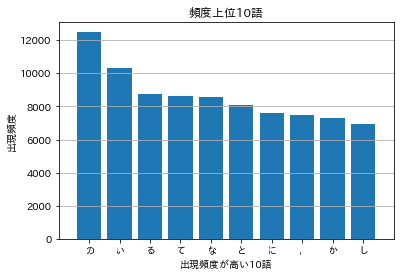

In [33]:
#knock37
import matplotlib.pyplot  as plt
import japanize_matplotlib

size = 10

list_word = word_counter.most_common(size)
print(list_word)
list_zipped = list(zip(*list_word))
words = list_zipped[0]
counts = list_zipped[1]

# 棒グラフのデータ指定
plt.bar(range(0,size), counts,tick_label=words)

# x軸のラベルの指定
#plt.xticks(range(0, size),words,fontproperties=fp)

# x軸の値の範囲の調整
plt.xlim(xmin=-1, xmax=size)

# グラフのタイトル、ラベル指定
plt.title('頻度上位10語')
plt.xlabel('出現頻度が高い10語')
plt.ylabel('出現頻度')

# グリッドを表示
plt.grid(axis='y')

# 表示
plt.show()

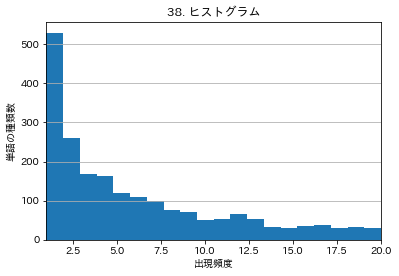

In [37]:
#knock38
list_word = word_counter.most_common()
list_zipped = list(zip(*list_word))
words = list_zipped[0]
counts = list_zipped[1]

plt.hist(counts,bins=20,range=(1,20))
plt.xlim(xmin=1, xmax=20)

# グラフのタイトル、ラベル指定
plt.title("38. ヒストグラム")
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')

# グリッドを表示
plt.grid(axis='y')

# 表示
plt.show()

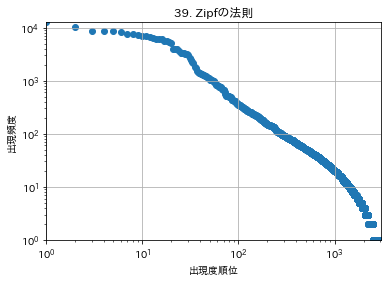

In [39]:
#knock39
list_word = word_counter.most_common()
list_zipped = list(zip(*list_word))
counts = list_zipped[1]
plt.scatter(range(1, len(counts) + 1),counts)

# 軸の値の範囲の調整
plt.xlim(1, len(counts) + 1)
plt.ylim(1, counts[0])

# 対数グラフに
plt.xscale('log')
plt.yscale('log')

# グラフのタイトル、ラベル指定
plt.title("39. Zipfの法則")
plt.xlabel('出現度順位')
plt.ylabel('出現頻度')

# グリッドを表示
plt.grid(axis='both')

# 表示
plt.show()